<a href="https://colab.research.google.com/github/fedhere/FDSfE_FBianco/blob/main/HW3/citibikes_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Written by Federica B. Bianco @fedhere
# for UDel FDSfE 2022


Citibikes is the shared bike services for NYC and they historically have done a great job at making their data public (while respecting people's privacy of course! well... almost always... https://www.wsj.com/articles/SB10001424127887323829104578624263439561672)

- # The "idea" is that citi bikes, which are farily bulky bikes, may be designed in such a way that they are more comfortable for larger people, and therefore, on average, for men.  

- # If the bikes are uncomfortable, the users will not use them for long trips. So to test that you can measure the trip duration for customers that are registered as male and customers that are registered as female and see if they have the same mean, and if they are "the same" distribution (more precisely you will meausre if they come from the "same parent distribution"). 

- # Choose the significance threshold

- # Clearly state they Null and Alternate hypothesis 

- # Wrangle the data so that it is ready for your analysis.

- # Explore the data statistical properties (mean, standard deviation...)

- # Answer the first question with a t-test

- # Answer the second question with a ks_2sample test

- Extra Credit: split the sample in week-days and weekends and redo the analysis for the week-days and weekend cases separately

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# IDEA:
## Citibike usage would be different by gender if the bikes are more comfrotable for people who are taller and with larger frames.

# NULL HYPOTHESIS:
## (You want to falsify it so make it the opposite of your idea)


# ALTERNATIVE HYPOTHESIS
## This shoudl be the complement of the NULL, including everything that the NULL does not




In [ ]:
pvalue = ...

## Get a single month of data:  reading data from citibike csv file from May 2019



read a csv file with pandas so that the content is stored in a "DataFrame". 

In [ ]:
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")
cbMay19

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0


In [ ]:
# explore the data 

In [ ]:
.....

SyntaxError: ignored

You hsould have noticed the column gender: its encoded as a binary - 1 is for customers that identified as male, 2 for customers that identified as female. 0 is for missing values. 

# save the data corresponding to "gender" == 1 and the data corresponding to "gender" == 2 into two separate dataframes


In [ ]:
cbMay19_genderf = cbMay19[cbMay19['gender'] == 2].drop(["gender"], axis=1)
cbMay19_genderm = cbMay19[cbMay19['gender'] == 1].drop(["gender"], axis=1)


In [ ]:
print(cbMay19_genderf.tripduration)

9          2733
10          236
12          536
20          290
22          553
           ... 
1924554     699
1924556     432
1924558     304
1924559     324
1924562     964
Name: tripduration, Length: 462613, dtype: int64


# plot the trip duration for gender=2 and gender=1



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1befd6d50>]],
      dtype=object)

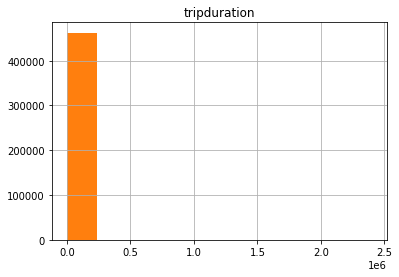

In [ ]:
ax = cbMay19_genderf.hist("tripduration")
cbMay19_genderf.hist("tripduration", ax=ax)


there are some really large numbers... trips that last >1000000 minutes...  clearly this is a dat curation issue. 
Remove all data for which tripduration > 1 day (remember the duration is in minutes) and remake the plot


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1beedc290>]],
      dtype=object)

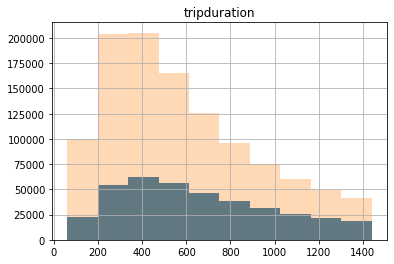

In [ ]:
cbMay19_genderf = cbMay19_genderf[cbMay19_genderf["tripduration"] <= 60*24]
cbMay19_genderm = cbMay19_genderm[cbMay19_genderm["tripduration"] <= 60*24]

ax = cbMay19_genderf.hist("tripduration")
cbMay19_genderm.hist("tripduration", ax=ax, alpha=0.3)

In [ ]:
cbMay19_genderf[cbMay19_genderf["tripduration"] <= 60*24]["tripduration"].mean(),\
cbMay19_genderm[cbMay19_genderm["tripduration"] <= 60*24]["tripduration"].mean()



(652.4541506624231, 588.4166944539049)

In [ ]:
cbMay19_genderf[cbMay19_genderf["tripduration"] <= 60*24]["tripduration"].std(),\
cbMay19_genderm[cbMay19_genderm["tripduration"] <= 60*24]["tripduration"].std()


(342.2888618686749, 335.25493400230937)

Notice how the histograms are differnt hights: one of the two categories has a lot more trips than the other one. Figure out which and discuss

Run two statistical tests: the Z test and the KS test. 


# Check if the mean of the samples is the same

Your Null hypothesis _H0_ and Alternative hypotehsis _HA_ are respectively:

H0: µ1 = µ2 (the two sample means are equal)

HA: µ1 ≠µ2 (the two sample means are not equal)

First look at the data summary statistics: are the means the same number? are the numbers contained within the respective standard deviations (i.e. is mean1 > mean2 - std2 and mean1 < mean2 + std2)? this will set some expextation.





< your thoughs on this here >



To answer the question more formally  test you can use the t-test. You can use the ttest_ind function in python ```scipy.stats.ttest_ind()``` passing the first sample for a and the other for b (ind stands for independent, i.e. the assumption is that the sample are independent samples)

In [ ]:
# get the usage information for the function here or on the webpage of the function
stats.ttest_ind? 

In [ ]:
stats.ttest_ind(a=cbMay19_genderm[cbMay19_genderm["tripduration"] <= 60*24]["tripduration"], 
                b=cbMay19_genderf[cbMay19_genderf["tripduration"] <= 60*24]["tripduration"], 
                equal_var=False)


Ttest_indResult(statistic=-99.86235225018126, pvalue=0.0)

interpret the result based on your chosen confidence threshold and on the results of the ttest_ind function. 



< your conclusions here >


The next test answers the questions: do the samples come from the same generative process (or "parent function"). Often we write the hypothesis for this test more simple as "are the distributions the same"





Write the NULL and Alternative hypothesis here

Run the test ```stats.ks_2samp```

In [ ]:
stats.ks_2samp(cbMay19_genderf.tripduration, cbMay19_genderf.tripduration)

KstestResult(statistic=0.0, pvalue=1.0)

In fact this test is very sensitive to differences in the mean of the sample. To use the test properly one should first normalize the data. That is: subtract the mean and divide by the standard deviation

In [ ]:
normed_f = (cbMay19_genderf["tripduration"] - cbMay19_genderf["tripduration"].mean()) / cbMay19_genderf["tripduration"].std()
normed_m = (cbMay19_genderm["tripduration"] - cbMay19_genderm["tripduration"].mean()) / cbMay19_genderm["tripduration"].std()

rerun the test after normalizing, did the conclusion change?

In [ ]:
stats.ks_2samp(normed_f, normed_m)

KstestResult(statistic=0.02278907853735008, pvalue=1.1717953531092037e-127)

# Extra Credit : do the same for week days only and weekends only

Pandas uses an excellent package to process dates! the datetime package

The current date columns are starttime and stoptime. You can convert starttime, which is currently a column containing simple strings, to a python datetime variable as follows



In [ ]:
cbMay19_genderf.starttime

In [ ]:
cbMay19["tripdate"] = pd.to_datetime(cbMay19.starttime)

Once you have a datetime column for the start of the trip you can separate week days and weekends using the condition 

```cbMay19["tripdate"].dt.weekday < 5```

for weekdays and 

```cbMay19["tripdate"].dt.weekday >= 5```

for weekends. 

With the dataset separate in weekend and weekdays you can ask the same kind of questions: is trip duration characteristically different on weekends than on week days, or, are the gender-based differences you found for the overall sample the same for weekdays and weekends?


In [ ]:

norm_w = len(cbMay19_w)
error_w = cbMay19_w["date"][cbMay19_w.date.dt.weekday < 5].groupby(cbMay19_w.date.dt.date).count().std()
error_w_weekend = cbMay19_w["date"][cbMay19_w.date.dt.weekday >= 5].groupby(cbMay19_w.date.dt.date).count().std()
norm_w, error_w, error_w_weekend

(462613, 3668.692203253557, 6529.945848605047)

In [ ]:

norm_m = len(cbMay19_m)
error_m = cbMay19_m["date"][cbMay19_m.date.dt.weekday < 5].groupby(cbMay19_m.date.dt.date).count().std()
error_m_weekend = cbMay19_m["date"][cbMay19_m.date.dt.weekday >= 5].groupby(cbMay19_m.date.dt.date).count().std()
norm_m, error_m, error_m_weekend

(1293779, 9078.43530575564, 13369.043033921955)

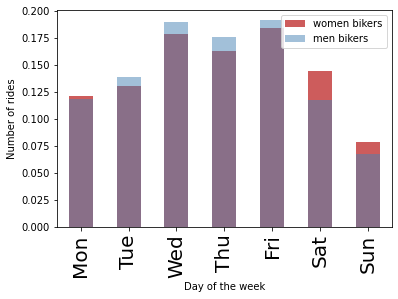

In [ ]:
ax=((counts_w) / norm_w).plot(kind="bar",color='IndianRed', label='women bikers')
(counts_m / norm_m).plot(kind="bar", alpha=0.5, 
                           color='SteelBlue', label='men bikers', ax=ax)
ax.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Day of the week")
plt.legend();


## Figure 2: Distribution of Citibike bikers by gender in May 2019, normalized

we can add up the weekend days and normalize by the totals, then this becomes a test of proportions, (like the one seen in the [employment notebook](https://github.com/fedhere/UInotebooks/blob/master/hypothesistesting/effectivenes%20of%20NYC%20Post-Prison%20Employment%20Programs.save.ipynb))

## Set up the test of proportions
### I need the fraction of women that bikes during the weekdays and the fraction that bikes during weekends, and the same for men

Men: week:0.815, weekend:0.185, weekend error:0.007, weekend error:0.010
Women: week:0.777, weekend:0.223, weekend error:0.008, weekend error:0.014


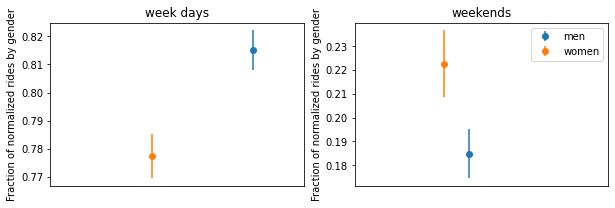

In [ ]:
fig = plt.figure(figsize=(10,3))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

week_w = sum(counts_w[:-2]) * 1.0 / norm_w  #fraction of women riding on week days
weekend_w = sum(counts_w[-2:]) * 1.0 / norm_w  #fraction of women riding on weekends
eweek_w = error_w / norm_w  #error on fraction number of women riding on week days
eweekend_w = error_w_weekend / norm_w #error on fraction number of women riding on weekends

#same nomenclature as above
week_m = sum(counts_m[:-2]) * 1.0 / norm_m
weekend_m = sum(counts_m[-2:]) * 1.0 / norm_m
eweek_m= error_m / norm_m  #error on fraction number of men riding on week days
eweekend_m = error_m_weekend / norm_m #error on fraction number of men riding on weekends

print("Men: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_m, weekend_m, eweek_m, eweekend_m))
print("Women: week:{0:.3f}, weekend:{1:.3f}, weekend error:{2:.3f}, weekend error:{3:.3f}"\
      .format(week_w, weekend_w, eweek_w, eweekend_w))

ax1.errorbar([0.4], [week_m], yerr=[eweek_m], fmt='o', label='men')
ax1.errorbar([0.2], [week_w], yerr=[eweek_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax2.errorbar([0.4], [weekend_m], yerr=[eweekend_m], fmt='o', label='men')
ax2.errorbar([0.2], [weekend_w], yerr=[eweekend_w], fmt='o', label='women')
ax1.set_xlim(0, 0.5)
ax1.set_title("week days")
ax2.set_title("weekends")
ax2.set_ylabel("Fraction of normalized rides by gender")
ax1.set_ylabel("Fraction of normalized rides by gender")
ax1.set_xticks([])
ax2.set_xticks([])
plt.xlim(-0.5, 1.5)
plt.legend();

## Figure 3: Fraction of Citibike bikers per gender in May 2019 for week days (left) and weekends (right)

### Is the percentage of women that ride on weekends lower or equal to that of man?
## The statistics is: 
# $z = \frac{(p_0 - p_1)}{SE} $
# $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
# $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
## and in this notation 
# $p_0 = \frac{W_{\mathrm{weekend}}}{W_{\mathrm{total}}}$
### and 
# $p_1 = \frac{M_{\mathrm{weekend}}}{M_{\mathrm{total}}}$


In [ ]:
P0mP1 = weekend_w - weekend_m
print ("difference between man and women on weekend: {:.2f}".format(P0mP1))
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between man and women on weekend: 0.04
We must check the significance before we reject the Null Hypothesis


### Is this difference statistically significant?

In [ ]:
# defining the functions that calculate the statistics
# the lambda style definition is NOT APPROVED BY PEP8 and you should avoind it
# but I am putting it here since you may encounter it in your coding life.
# confront the equation in the markdown cell above with these function to understand as they work

def ztest_p(p0, p1, n0, n1): 
  return (p0 * n0 + p1 * n1) / (n0 + n1)
def ztest_se(p0, p1, n0, n1):
  p = ztest_p(p0, p1, n0, n1)
  return np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
def zscore(p0, p1, n0, n1) : 
  return (p0 - p1) / ztest_se(p0, p1, n0, n1)

# calculations

z = zscore(weekend_w, weekend_m, norm_w, norm_m)
print ("The z statistics is %.2f"%z) 

The z statistics is 55.71


## The largest number reported in  z stats tables is (thpically) 3, which gives  a p value
## $p <0.0002$, which is smaller then my chosen $\alpha=0.05$ - so yes, it is statistically significant (by a lot!)

# We reject the Null Hypothesis that man are more likely to commute than women $p< 0.05$


# Let's check the _effect size_: 
# there are 2 formulae I find in the literature
# $r = \frac{z}{\sqrt{(n_0+n_1)}}$
# and
# $h =  2 (\arcsin \sqrt{p_0} -  \arcsin \sqrt{p_1} )$. https://en.wikipedia.org/wiki/Cohen%27s_h

In [ ]:
def r_effectsize (z, n0, n1) :
  return z / np.sqrt(n0 + n0)
def h_effectsize (p0, p1): 
  return 2 * (np.arcsin(np.sqrt(p0)) - np.arcsin(np.sqrt(p1)))

In [ ]:
r = r_effectsize(z, norm_w, norm_m)
print ('r effect size {:.2f}'.format(r))

r effect size 0.06


In [ ]:
h = h_effectsize(weekend_w, weekend_m)
print ("Cohen's h effect size {:.2f}".format(h))

Cohen's h effect size 0.09


# In all these cases we have SMALL EFFECT SIZE